In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gst-pred/Train_60 2/Instructions.txt
/kaggle/input/gst-pred/Train_60 2/Y_Train_Data_Target.csv
/kaggle/input/gst-pred/Train_60 2/correlation.PNG
/kaggle/input/gst-pred/Train_60 2/Y_Test_Data_Target_20.csv
/kaggle/input/gst-pred/Train_60 2/SHA_256.txt
/kaggle/input/gst-pred/Train_60 2/checksum.py
/kaggle/input/gst-pred/Train_60 2/X_Train_Data_Input.csv
/kaggle/input/gst-pred/Train_60 2/X_Test_Data_Input_20.csv


In [3]:
df= pd.read_csv('/kaggle/input/gst-pred/Train_60 2/X_Train_Data_Input.csv')
y_train=pd.read_csv('/kaggle/input/gst-pred/Train_60 2/Y_Train_Data_Target.csv')

In [4]:
df['Column14'].fillna(df['Column14'].mean(), inplace=True)
df['Column3'].fillna(df['Column3'].mean(), inplace=True)
df['Column4'].fillna(df['Column4'].mean(), inplace=True)
df['Column5'].fillna(df['Column5'].mean(), inplace=True)
df['Column9'].fillna(df['Column5'].mean(), inplace=True)
# For columns with minimal missing values, you can do the same
df['Column0'].fillna(df['Column0'].mean(), inplace=True)
df['Column6'].fillna(df['Column6'].mean(), inplace=True)
df['Column8'].fillna(df['Column8'].mean(), inplace=True)
df['Column15'].fillna(df['Column15'].mean(), inplace=True)
# Recheck for missing values
print(df.isnull().sum())



ID          0
Column0     0
Column1     0
Column2     0
Column3     0
Column4     0
Column5     0
Column6     0
Column7     0
Column8     0
Column9     0
Column10    0
Column11    0
Column12    0
Column13    0
Column14    0
Column15    0
Column16    0
Column17    0
Column18    0
Column19    0
Column20    0
Column21    0
dtype: int64


/tmp/ipykernel_323/3293214347.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Column14'].fillna(df['Column14'].mean(), inplace=True)
/tmp/ipykernel_323/3293214347.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [5]:
data = pd.merge(df, y_train, on='ID')
data.head()

ID  Column0  Column1  Column2   Column3  \
0  ad1a67e4cbddc767a3456b0d94299b9e      2.0     2495   3726.0  0.678139   
1  7246d2f76ac0c217ec25e72ea5f014cb      0.0     2495   3454.0  0.452580   
2  22ba388e7dd14c13342c49e75fc29dda      2.0     2495   4543.0 -1.577453   
3  59f9b981472d97342587fb3e6392aeb1      0.0      211     59.0 -0.000210   
4  f6317cf7ecf126859804eddff279aead      0.0      718    950.0 -2.028572   

    Column4   Column5   Column6   Column7   Column8  ...  Column13  Column14  \
0  0.701403 -0.007468  0.434190 -0.015603  0.606265  ...         0  0.001351   
1  0.701403 -0.007468  1.554998 -0.015574  0.329946  ...         0  0.001351   
2 -1.429540 -0.007469 -0.407939 -0.015607 -0.774979  ...         1  0.001351   
3 -0.000855 -0.000367 -0.407939 -0.015607 -0.774979  ...         0 -0.000863   
4 -1.855728 -0.000367 -0.407939 -0.015607 -0.774979  ...         0 -0.000863   

   Column15  Column16  Column17  Column18  Column19  Column20  Column21  \
0   0.00339       0.0         0       0.0         0         0         0   
1   0.00339       0.0         0       0.0         0         0         0   
2   0.00339       0.0         0       0.0         0         0         0   
3   0.00339       0.0         0       1.0         0         0         0   
4   0.00339       0.0         0       0.0         0         0         0   

   target  
0       0  
1       0  
2       0  
3       1  
4       0  

[5 rows x 24 columns]

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785133 entries, 0 to 785132
Data columns (total 24 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ID        785133 non-null  object 
 1   Column0   785133 non-null  float64
 2   Column1   785133 non-null  int64  
 3   Column2   785133 non-null  float64
 4   Column3   785133 non-null  float64
 5   Column4   785133 non-null  float64
 6   Column5   785133 non-null  float64
 7   Column6   785133 non-null  float64
 8   Column7   785133 non-null  float64
 9   Column8   785133 non-null  float64
 10  Column9   785133 non-null  float64
 11  Column10  785133 non-null  int64  
 12  Column11  785133 non-null  int64  
 13  Column12  785133 non-null  int64  
 14  Column13  785133 non-null  int64  
 15  Column14  785133 non-null  float64
 16  Column15  785133 non-null  float64
 17  Column16  785133 non-null  float64
 18  Column17  785133 non-null  int64  
 19  Column18  785133 non-null  float64
 20  Colu

In [7]:
data = data.drop(columns=['ID']) 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785133 entries, 0 to 785132
Data columns (total 23 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Column0   785133 non-null  float64
 1   Column1   785133 non-null  int64  
 2   Column2   785133 non-null  float64
 3   Column3   785133 non-null  float64
 4   Column4   785133 non-null  float64
 5   Column5   785133 non-null  float64
 6   Column6   785133 non-null  float64
 7   Column7   785133 non-null  float64
 8   Column8   785133 non-null  float64
 9   Column9   785133 non-null  float64
 10  Column10  785133 non-null  int64  
 11  Column11  785133 non-null  int64  
 12  Column12  785133 non-null  int64  
 13  Column13  785133 non-null  int64  
 14  Column14  785133 non-null  float64
 15  Column15  785133 non-null  float64
 16  Column16  785133 non-null  float64
 17  Column17  785133 non-null  int64  
 18  Column18  785133 non-null  float64
 19  Column19  785133 non-null  int64  
 20  Colu

Feature: Column18 Score: 0.2371175713911997
Feature: Column1 Score: 0.1201877791309851
Feature: Column17 Score: 0.04867787015045
Feature: Column4 Score: 0.04494680898338821
Feature: Column3 Score: 0.04311691707700405
Feature: Column14 Score: 0.034844695426437866
Feature: Column8 Score: 0.018907096428650405
Feature: Column19 Score: 0.0182583083037402
Feature: Column5 Score: 0.017797796646506825
Feature: Column6 Score: 0.016216423273661462
Feature: Column15 Score: 0.011174041545506164
Feature: Column2 Score: 0.010671483985653651
Feature: Column12 Score: 0.008855124518285074
Feature: Column7 Score: 0.007598008313813409
Feature: Column20 Score: 0.006469821946457621
Feature: Column10 Score: 0.006097590338399961
Feature: Column13 Score: 0.005108784855526238
Feature: Column0 Score: 0.004276580430660815
Feature: Column11 Score: 0.0038740491378952413
Feature: Column16 Score: 0.003667097491589111
Feature: Column9 Score: 0.003488672224857936
Feature: Column21 Score: 0.003485668457865465


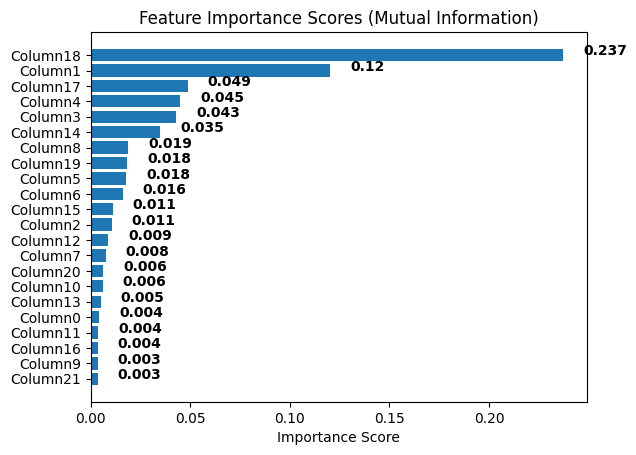

In [130]:
from sklearn.feature_selection import mutual_info_regression
import numpy as np
import matplotlib.pyplot as plt

# Assuming `data` is a pandas DataFrame
X = data.drop(columns=['target'])  # Features (all PCA components or original features)
y = data['target']  # Target variable

# Calculate mutual information between each feature and the target
ig = mutual_info_regression(X, y)

# Create a dictionary of feature importance scores using DataFrame's column names
feature_scores = {}
for i in range(len(X.columns)):
    feature_scores[X.columns[i]] = ig[i]

# Sort the features by importance score in descending order
sorted_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)

# Print the feature importance scores and the sorted features
for feature, score in sorted_features:
    print("Feature:", feature, "Score:", score)

# Plot a horizontal bar chart of the feature importance scores
fig, ax = plt.subplots()
y_pos = np.arange(len(sorted_features))
ax.barh(y_pos, [score for feature, score in sorted_features], align="center")
ax.set_yticks(y_pos)
ax.set_yticklabels([feature for feature, score in sorted_features])
ax.invert_yaxis()  # Labels read top-to-bottom
ax.set_xlabel("Importance Score")
ax.set_title("Feature Importance Scores (Mutual Information)")

# Add importance scores as labels on the horizontal bar chart
for i, v in enumerate([score for feature, score in sorted_features]):
    ax.text(v + 0.01, i, str(round(v, 3)), color="black", fontweight="bold")

plt.show()


In [133]:
# First, install skfeature
!pip install skfeature-chappers


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 kB 1.4 MB/s eta 0:00:00a 0:00:01


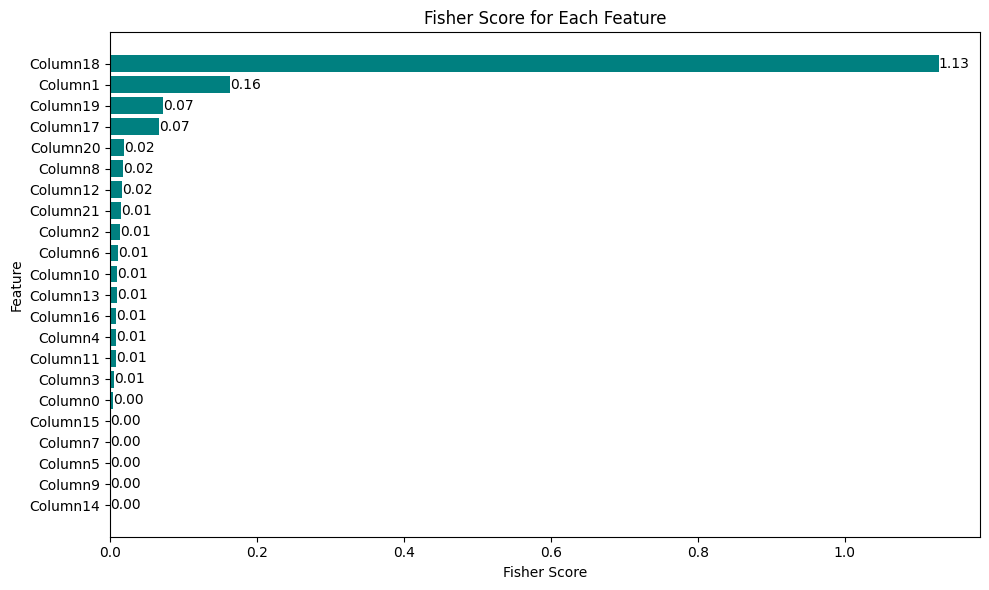

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def fisher_score(X, y):
    classes = np.unique(y)
    scores = []

    for col in X.columns:
        numer = 0.0
        denom = 0.0
        for c in classes:
            X_c = X[col][y == c]
            mean_c = X_c.mean()
            mean = X[col].mean()

            numer += len(X_c) * (mean_c - mean)**2
            denom += ((X_c - mean_c)**2).sum()

        scores.append(numer / denom)

    return np.array(scores)

# Example data
# X = data.drop('target', axis=1)
# y = data['target']

# Compute Fisher's Score for each feature
X = data.drop(columns=['target'])  # Features (all PCA components or original features)
y = data['target']  # Target variable
fisher_scores = fisher_score(X, y)

# Create a DataFrame to display Fisher's Scores
fisher_df = pd.DataFrame({'Feature': X.columns, 'Fisher Score': fisher_scores})

# Sort features by Fisher Score
fisher_df.sort_values(by='Fisher Score', ascending=False, inplace=True)

# Plotting the Fisher Scores
plt.figure(figsize=(10, 6))
plt.barh(fisher_df['Feature'], fisher_df['Fisher Score'], color='teal')
plt.xlabel('Fisher Score')
plt.ylabel('Feature')
plt.title('Fisher Score for Each Feature')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest score on top

# Add score labels to the bars
for index, value in enumerate(fisher_df['Fisher Score']):
    plt.text(value, index, f'{value:.2f}', va='center')

plt.tight_layout()
plt.show()


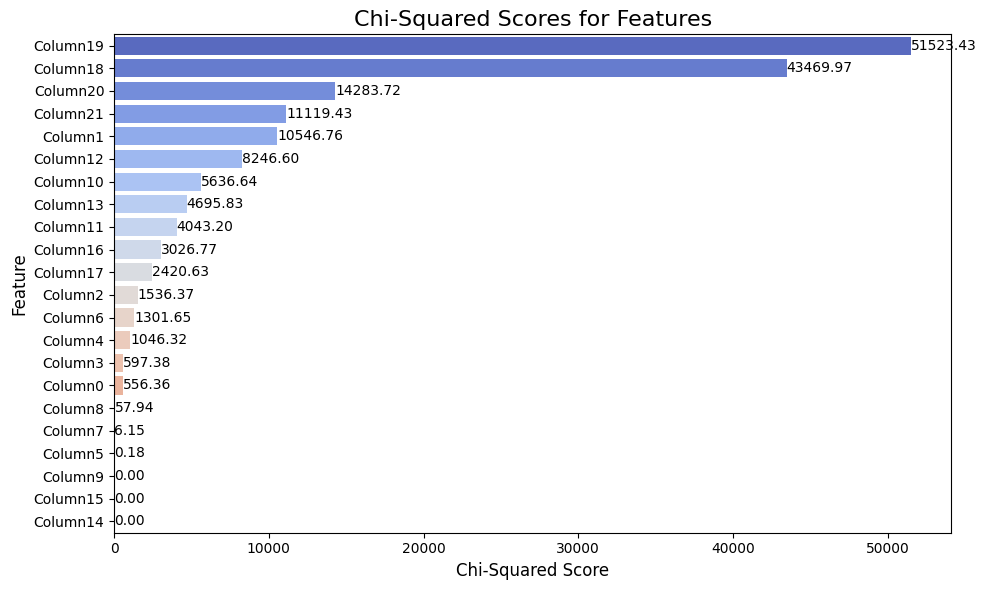

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

# Assuming 'data' is your DataFrame with features and 'target' is the column name
# X = data.drop('target', axis=1)
# y = data['target']

# Chi-square requires non-negative values, so we scale X to [0, 1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Perform Chi-Squared test
chi_scores = chi2(X_scaled, y)

# Create a DataFrame to display Chi-Squared scores and p-values
chi2_df = pd.DataFrame({'Feature': X.columns, 'Chi-Squared Score': chi_scores[0], 'p-value': chi_scores[1]})

# Sort features by Chi-Squared score
chi2_df.sort_values(by='Chi-Squared Score', ascending=False, inplace=True)

# Plotting the Chi-Squared Scores
plt.figure(figsize=(10, 6))
sns.barplot(x='Chi-Squared Score', y='Feature', data=chi2_df, palette='coolwarm')
plt.title('Chi-Squared Scores for Features', fontsize=16)
plt.xlabel('Chi-Squared Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)

# Add score labels to the bars
for index, value in enumerate(chi2_df['Chi-Squared Score']):
    plt.text(value, index, f'{value:.2f}', va='center', ha='left', color='black')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Load the breast cancer dataset
# data = load_breast_cancer()

# Split the dataset into features and target
# X = data.data
# y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Define the logistic regression model
model = LogisticRegression()

# Define the forward selection object
sfs = SFS(model, k_features=21, forward=True, floating=False, scoring="accuracy", cv=5)

# Perform forward selection on the training set
sfs.fit(X_train, y_train)

# Print the selected features
print("Selected Features:", sfs.k_feature_names_)

# Evaluate the performance of the selected features on the testing set
accuracy = sfs.k_score_
print("Accuracy:", accuracy)

# Plot the performance of the model with different feature subsets
sfs_df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
sfs_df["avg_score"] = sfs_df["avg_score"].astype(float)
fig, ax = plt.subplots()
sfs_df.plot(kind="line", y="avg_score", ax=ax)
ax.set_xlabel("Number of Features")
ax.set_ylabel("Accuracy")
ax.set_title("Forward Selection Performance")
plt.show()

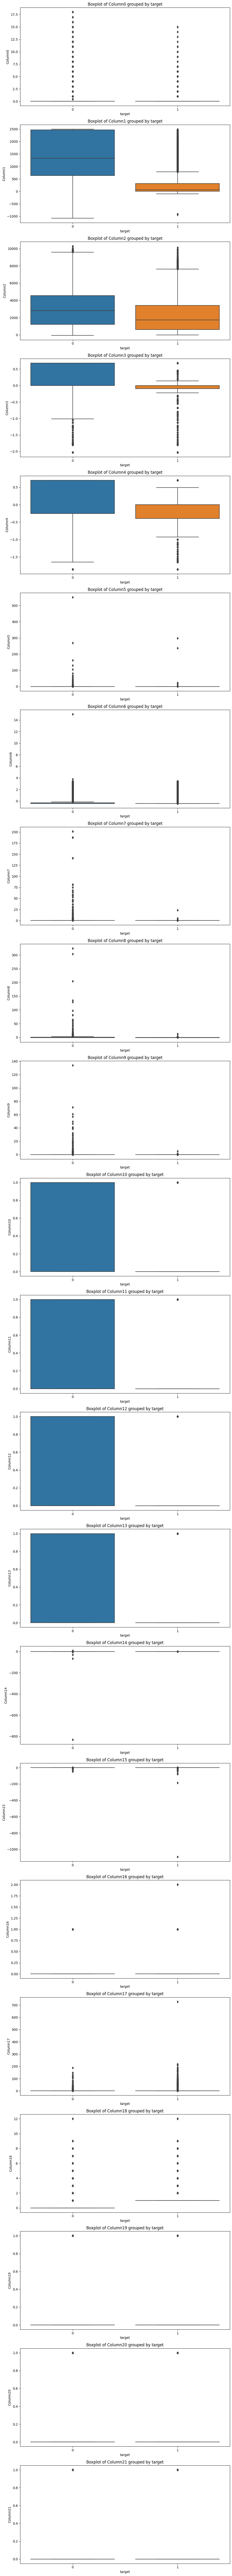

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and 'target' is the column name for the target values (0 or 1)

def plot_boxplots(df, target_column):
    # Get all feature columns (excluding the target column)
    features = df.columns[df.columns != target_column]

    # Create subplots based on the number of features
    num_features = len(features)
    fig, axes = plt.subplots(nrows=num_features, ncols=1, figsize=(10, 5 * num_features))

    if num_features == 1:
        axes = [axes]  # Ensure axes is a list when there's only one feature

    for i, feature in enumerate(features):
        sns.boxplot(x=target_column, y=feature, data=df, ax=axes[i])
        axes[i].set_title(f'Boxplot of {feature} grouped by {target_column}')
        axes[i].set_xlabel(target_column)
        axes[i].set_ylabel(feature)

    plt.tight_layout()
    plt.show()

# Example usage:
# df = pd.read_csv('your_dataset.csv')
plot_boxplots(data, target_column='target')


In [119]:
import pandas as pd

def remove_outliers_by_target(df, target_column, multiplier=10):
    # Get all feature columns (excluding the target column)
    features = df.columns[df.columns != target_column]

    # Create an empty DataFrame to store results after outlier removal
    df_cleaned = pd.DataFrame()

    # Iterate through each target group (0 and 1)
    for target_value in df[target_column].unique():
        df_group = df[df[target_column] == target_value]

        # Remove outliers feature by feature for this target group
        for feature in features:
            Q1 = df_group[feature].quantile(0.25)
            Q3 = df_group[feature].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - multiplier * IQR
            upper_bound = Q3 + multiplier * IQR

            # Keep only rows within the bounds for this feature
            df_group = df_group[(df_group[feature] >= lower_bound) & (df_group[feature] <= upper_bound)]

        # Append the cleaned group to the result DataFrame
        df_cleaned = pd.concat([df_cleaned, df_group])

    return df_cleaned

# Example usage:
df_cleaned = remove_outliers_by_target(data, target_column='target', multiplier=3)  # Use a smaller multiplier


In [120]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 229074 entries, 5 to 785072
Data columns (total 23 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Column0   229074 non-null  float64
 1   Column1   229074 non-null  int64  
 2   Column2   229074 non-null  float64
 3   Column3   229074 non-null  float64
 4   Column4   229074 non-null  float64
 5   Column5   229074 non-null  float64
 6   Column6   229074 non-null  float64
 7   Column7   229074 non-null  float64
 8   Column8   229074 non-null  float64
 9   Column9   229074 non-null  float64
 10  Column10  229074 non-null  int64  
 11  Column11  229074 non-null  int64  
 12  Column12  229074 non-null  int64  
 13  Column13  229074 non-null  int64  
 14  Column14  229074 non-null  float64
 15  Column15  229074 non-null  float64
 16  Column16  229074 non-null  float64
 17  Column17  229074 non-null  int64  
 18  Column18  229074 non-null  float64
 19  Column19  229074 non-null  int64  
 20  Column20 

In [121]:
df_test = pd.read_csv('/kaggle/input/gst-pred/Train_60 2/X_Test_Data_Input_20.csv')
df_test['Column14'].fillna(df['Column14'].mean(), inplace=True)
df_test['Column3'].fillna(df['Column3'].mean(), inplace=True)
df_test['Column4'].fillna(df['Column4'].mean(), inplace=True)
df_test['Column5'].fillna(df['Column5'].mean(), inplace=True)
df_test['Column9'].fillna(df['Column9'].mean(), inplace=True)
# For columns with minimal missing values, you can do the same
df_test['Column0'].fillna(df['Column0'].mean(), inplace=True)
df_test['Column6'].fillna(df['Column6'].mean(), inplace=True)
df_test['Column8'].fillna(df['Column8'].mean(), inplace=True)
df_test['Column15'].fillna(df['Column15'].mean(), inplace=True)
# Recheck for missing values
print(df_test.isnull().sum())

ID          0
Column0     0
Column1     0
Column2     0
Column3     0
Column4     0
Column5     0
Column6     0
Column7     0
Column8     0
Column9     0
Column10    0
Column11    0
Column12    0
Column13    0
Column14    0
Column15    0
Column16    0
Column17    0
Column18    0
Column19    0
Column20    0
Column21    0
dtype: int64


/tmp/ipykernel_30/515366332.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['Column14'].fillna(df['Column14'].mean(), inplace=True)
/tmp/ipykernel_30/515366332.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

In [122]:
y_test =pd.read_csv('/kaggle/input/gst-pred/Train_60 2/Y_Test_Data_Target_20.csv')

In [123]:
data1 = pd.merge(df_test, y_test, on='ID')
data1.head()

ID  Column0  Column1  Column2   Column3  \
0  07cf2025382f6325b316e128b1b90999      1.0     1986     53.0  0.678139   
1  eb972eb3a1f8d0d1a13f45e7c07d37d4      2.0     1579     12.0  0.678139   
2  ee35e164b3ddc25a9f40243b81ad290d      0.0      898   3817.0 -2.028572   
3  28229ccd7bad7dd83324a4175a7e0531      0.0       79   3449.0 -0.675216   
4  2f94873da2c332d28f111742818e0fbb      1.0      646   6510.0 -2.028572   

    Column4   Column5   Column6   Column7   Column8  ...  Column13  Column14  \
0  0.701403 -0.007469 -0.407939 -0.015607  0.554860  ...         1  0.001351   
1  0.701403 -0.007468 -0.407939 -0.015607  0.142149  ...         0  0.001351   
2 -1.855728 -0.000367 -0.407939 -0.015607 -0.774979  ...         0 -0.000863   
3 -0.577162 -0.007469  0.004020 -0.015607  0.635264  ...         1  0.001351   
4 -1.855728 -0.000367 -0.407939 -0.015434 -0.774979  ...         1 -0.000863   

   Column15  Column16  Column17  Column18  Column19  Column20  Column21  \
0   0.00339       0.0         0       0.0         0         0         0   
1   0.00339       0.0         0       0.0         0         0         0   
2   0.00339       0.0         0       0.0         0         0         0   
3   0.00339       0.0         0       0.0         0         0         0   
4   0.00339       0.0         0       0.0         0         0         0   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

[5 rows x 24 columns]

In [124]:
data1 = data1.drop(columns=['ID']) 

In [125]:
X_train = df_cleaned.drop(columns=['target'])  # Features (all PCA components)
y_train = df_cleaned['target']  # Target variable
X_test = data1.drop(columns=['target'])  # Features (all PCA components)
y_test = data1['target']  # Target variable

In [126]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                             balanced_accuracy_score, roc_auc_score, roc_curve,
                             precision_score, recall_score, f1_score)
import matplotlib.pyplot as plt

# Load the reduced dataset (final_df)
# Note: Assuming 'final_df' contains the PCA-transformed features and the 'target' column

# Define features and target


# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
logreg = LogisticRegression(max_iter=1000)  # max_iter is set high to ensure convergence

# Train the model
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy:.4f}")

accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])  # Use probabilities for ROC-AUC
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print(f"Model 1 Accuracy: {accuracy:.4f}")
print(f"Model 1 Balanced Accuracy: {balanced_accuracy:.4f}")
print(f"Model 1 ROC-AUC Score: {roc_auc:.4f}")
print(f"Model 1 Precision: {precision:.4f}")
print(f"Model 1 Recall: {recall:.4f}")
print(f"Model 1 F1 Score: {f1:.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))




Model 1 Accuracy: 0.9648
Model 1 Balanced Accuracy: 0.9791
Model 1 ROC-AUC Score: 0.9872
Model 1 Precision: 0.7291
Model 1 Recall: 0.9967
Model 1 F1 Score: 0.8422

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    237034
           1       0.73      1.00      0.84     24678

    accuracy                           0.96    261712
   macro avg       0.86      0.98      0.91    261712
weighted avg       0.97      0.96      0.97    261712



In [127]:
import numpy as np
import xgboost as xgb
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train the model
xgb_model.fit(X_train, y_train)

# Get predicted probabilities
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve to find optimal threshold
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Find the best threshold based on a specific criterion
# One common approach is to find the threshold where (tpr - fpr) is maximized (Youden's J statistic)
j_scores = tpr - fpr
optimal_idx = np.argmax(j_scores)
optimal_threshold = thresholds[optimal_idx]

# Print the optimal threshold
print(f"Optimal Threshold: {optimal_threshold:.4f}")

# Apply the threshold to get class predictions
y_pred_custom_threshold = (y_pred_proba >= optimal_threshold).astype(int)

# Calculate performance metrics with the custom threshold
accuracy = accuracy_score(y_test, y_pred_custom_threshold)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_custom_threshold)
roc_auc = roc_auc_score(y_test, y_pred_proba)  # Use probabilities for ROC-AUC
precision = precision_score(y_test, y_pred_custom_threshold, average='binary')
recall = recall_score(y_test, y_pred_custom_threshold, average='binary')
f1 = f1_score(y_test, y_pred_custom_threshold, average='binary')

# Print all the metrics
print(f"Model 1 Accuracy: {accuracy:.4f}")
print(f"Model 1 Balanced Accuracy: {balanced_accuracy:.4f}")
print(f"Model 1 ROC-AUC Score: {roc_auc:.4f}")
print(f"Model 1 Precision: {precision:.4f}")
print(f"Model 1 Recall: {recall:.4f}")
print(f"Model 1 F1 Score: {f1:.4f}")

# Classification report and confusion matrix
print(classification_report(y_test, y_pred_custom_threshold))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_custom_threshold))


Optimal Threshold: 0.9996
Model 1 Accuracy: 0.9635
Model 1 Balanced Accuracy: 0.9799
Model 1 ROC-AUC Score: 0.9903
Model 1 Precision: 0.7210
Model 1 Recall: 1.0000
Model 1 F1 Score: 0.8379
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    237034
           1       0.72      1.00      0.84     24678

    accuracy                           0.96    261712
   macro avg       0.86      0.98      0.91    261712
weighted avg       0.97      0.96      0.97    261712

Confusion Matrix:
[[227483   9551]
 [     0  24678]]


In [128]:
import numpy as np
import xgboost as xgb
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train the model
xgb_model.fit(X_train, y_train)

# Get predicted probabilities for the positive class (1)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC score (without needing a specific threshold)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"Model ROC-AUC Score: {roc_auc:.4f}")

# Define threshold range from 0 to 1 with a step size of 0.1
thresholds = np.arange(0.0, 1.1, 0.1)  # [0.0, 0.1, 0.2, ..., 1.0]

# Variables to track the best threshold and corresponding F1 score
best_threshold = 0.5  # Default threshold
best_f1 = 0  # Initialize best F1 score

# Loop over thresholds to find the one that maximizes F1 score (or another metric)
for threshold in thresholds:
    # Apply the threshold to convert probabilities to binary predictions
    y_pred_threshold = (y_pred_proba >= threshold).astype(int)
    
    # Calculate F1 score at this threshold
    f1 = f1_score(y_test, y_pred_threshold, average='binary')
    
    # Update if the F1 score at this threshold is better than the current best
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

print(f"Best Threshold: {best_threshold:.2f}")
print(f"Best F1 Score at Optimal Threshold: {best_f1:.4f}")

# Apply the optimal threshold to get final predictions
y_pred_optimal = (y_pred_proba >= best_threshold).astype(int)

# Calculate performance metrics with the optimal threshold
accuracy = accuracy_score(y_test, y_pred_optimal)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_optimal)
precision = precision_score(y_test, y_pred_optimal, average='binary')
recall = recall_score(y_test, y_pred_optimal, average='binary')

# Print performance metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {best_f1:.4f}")


Model ROC-AUC Score: 0.9903
Best Threshold: 0.10
Best F1 Score at Optimal Threshold: 0.8379
Accuracy: 0.9635
Balanced Accuracy: 0.9799
Precision: 0.7210
Recall: 1.0000
F1 Score: 0.8379
